<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/Gradient_Boosting_Regression_implementaion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pa
import matplotlib.pyplot as plt
import numpy as np

creating a database

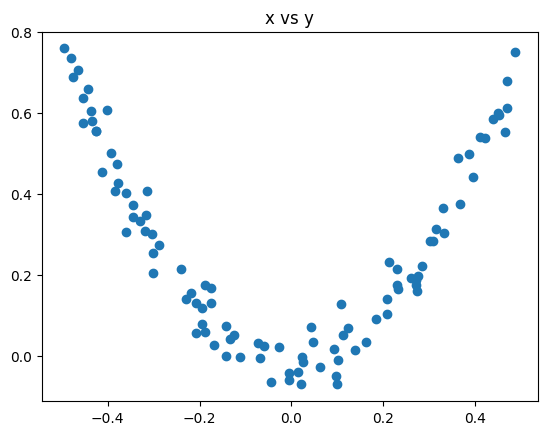

In [15]:
np.random.seed(42)
x= np.random.rand(100,1) - 0.5
y = 3*x[:,0]**2 + 0.05* np.random.randn(100)
df = pa.DataFrame()
df['x'] = x.reshape(100)
df['x'] = x.reshape(100)
df['y'] = y
plt.scatter(df['x'],df['y'])
plt.title('x vs y')
plt.show()


In [16]:
# initial prediction with mean value (model m1)

df['pred1'] = df['y'].mean()

clacualting Pseudo-residuals

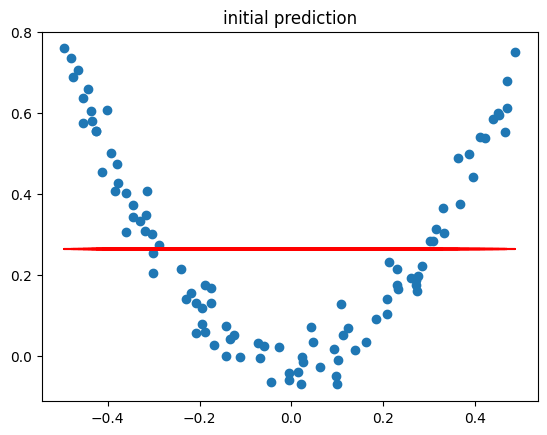

In [17]:
df['res1'] = df['y'] - df['pred1']
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color='red')
plt.title('initial prediction')
plt.show()

building the second model m2

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

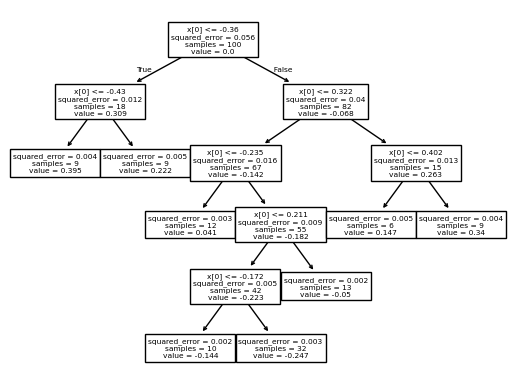

In [19]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

update predictions model m2

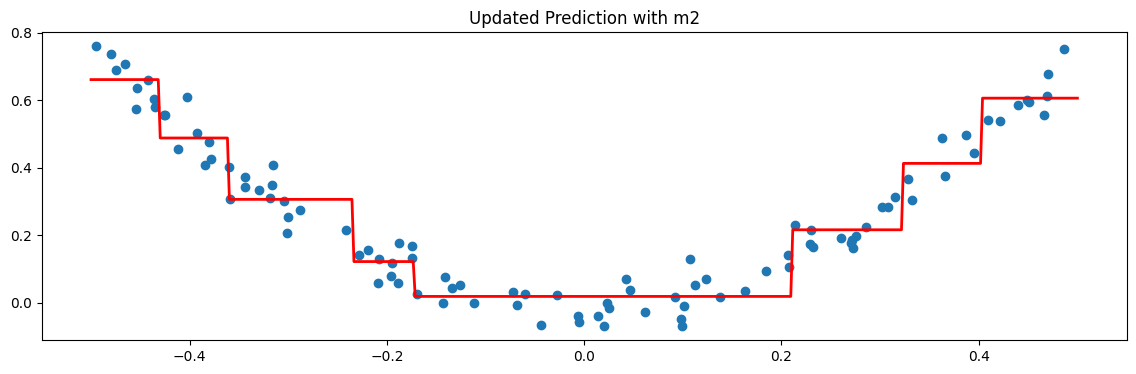

In [20]:
x_test = np.linspace(-0.5, 0.5, 500)
y_pred = df['pred1'].iloc[0] + tree1.predict(x_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('Updated Prediction with m2')
plt.show()

Adding a Third Model (m3)

In [21]:
df['pred2'] = df['pred1'].iloc[0] + tree1.predict(df['x'].values.reshape(100, 1))
df['res2'] = df['y'] - df['pred2']

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['x'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

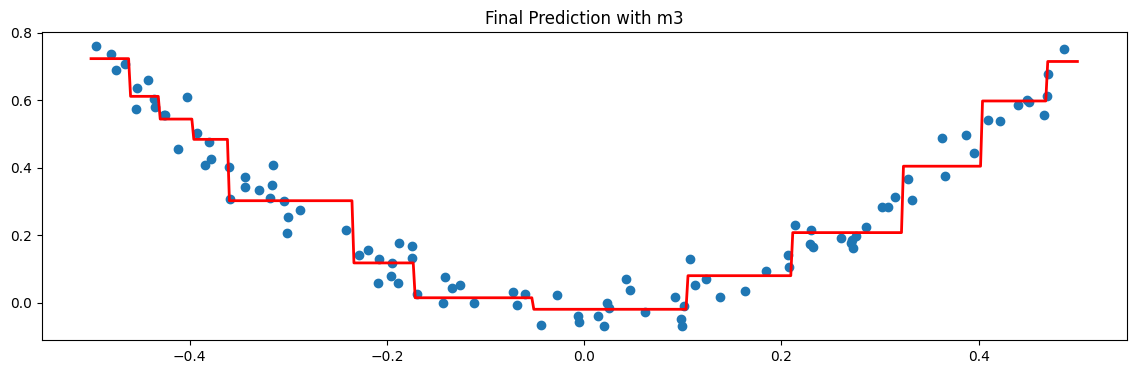

In [22]:
y_pred = df['pred1'].iloc[0] + tree1.predict(x_test.reshape(500, 1)) + tree2.predict(x_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('Final Prediction with m3')
plt.show()